In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


Text(0.5, 1.0, 'Ground Truth : 3')

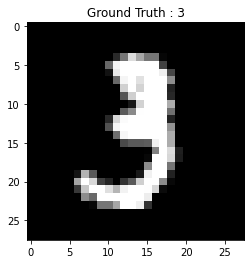

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
print(train_images.shape)
print(train_labels.shape)
plt.imshow(train_images[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[10]))
# plt.show()

In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [5]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 7s 27ms/step - loss: 24.0769 - accuracy: 0.7905 - val_loss: 1.1241 - val_accuracy: 0.8979
Epoch 2/20
235/235 [==============================] - 6s 25ms/step - loss: 0.4533 - accuracy: 0.9461 - val_loss: 0.3713 - val_accuracy: 0.9503
Epoch 3/20
235/235 [==============================] - 6s 25ms/step - loss: 0.2233 - accuracy: 0.9618 - val_loss: 0.3556 - val_accuracy: 0.9469
Epoch 4/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1973 - accuracy: 0.9670 - val_loss: 0.2185 - val_accuracy: 0.9678
Epoch 5/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1497 - accuracy: 0.9749 - val_loss: 0.4170 - val_accuracy: 0.9542
Epoch 6/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1528 - accuracy: 0.9762 - val_loss: 0.3076 - val_accuracy: 0.9668
Epoch 7/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1401 - accuracy: 0.9801 - val_loss: 0.3349 - val_accuracy: 0.971